# Prototype

## Import packages

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from annoy import AnnoyIndex

In [2]:
tf.__version__

'2.4.1'

## Paths & Config

In [3]:
MODEL_PATH = "models/classifier.h5"
ANNOY_PATH = "./models/model.ann"
MAPPING = "./models/id_to_path.json"

WIDTH = 150
HEIGHT = 150

NEIGHBORS = 9

## Restore Mapping

In [4]:
with open(MAPPING, "r") as f:
    id_to_path = json.load(f)
    feature_dim = id_to_path["feature_dim"]
    id_to_path = id_to_path["id_to_path"]

## Restore Annoy model

In [5]:
t = AnnoyIndex(feature_dim, 'angular')
t.load(ANNOY_PATH)

True

## Restore model

In [6]:
# Restore model
encoder = keras.models.load_model(MODEL_PATH)
# Remove classifier top layer
encoder.pop()
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
Total params: 23,900,960
Trainable params: 2,098,176
Non-trainable params: 21,802,784
_________________________________________________________________


In [7]:
def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = image.resize((WIDTH, HEIGHT))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    return image

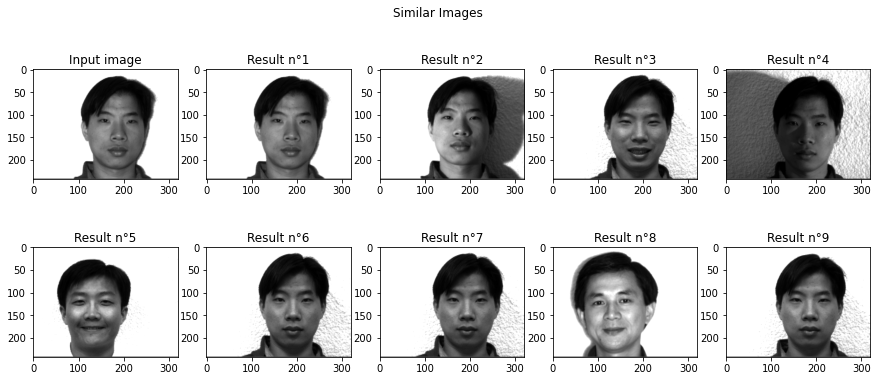

In [8]:
def search(image_path):
    # 1. Load image
    image = load_image(image_path)
    # 2. Extract features
    feature = encoder.predict(image)[0]
    # 3. Search
    results = t.get_nns_by_vector(feature, NEIGHBORS)

    # Show images
    fig = plt.figure(figsize=(15, 6))
    # Input image
    fig.add_subplot(2, 5, 1)
    image = plt.imread(image_path)
    plt.imshow(image, cmap="gray")
    plt.title("Input image")
    # Results
    for i in range(NEIGHBORS):
        fig.add_subplot(2, 5, i+2)
        image = plt.imread(id_to_path[str(results[i])])
        plt.imshow(image, cmap="gray")
        plt.title("Result n°"+str(i+1))
    plt.suptitle('Similar Images')
    plt.show()

search(id_to_path[str(0)])